In [1]:
import string
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

## The Exploratory Data Analysis on 1M SARC dataset

There are 1010826 rows in this balanced dataset, 505413 are sarcastic comments, the other 505413 are not.

In [2]:
df = pd.read_csv('train-balanced-sarcasm.csv')
print(df.shape)
df.head()

(1010826, 10)


,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...


In [3]:
df['label'].value_counts()

1    505413
0    505413
Name: label, dtype: int64

There are 53 NaN values in the our target variable, comment. 45 are labeled as sarcastic comments, 8 are labeled as normal comments. We want to take these rows out from the dataset. After removing 53 rows, 505405 are sarcastic comments, 505368 are normal comments. Since we only remove a small portion of the data, the dataset is still balanced.

In [4]:
df[df['comment'].isna()]

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
56269,1,NaN,SodokuIRL,leagueoflegends,1,1,0,2016-09,2016-09-28 08:23:04,"LPL shitshow, EU LCS shitshow. What isn't a sh..."
68590,1,NaN,TossTheDog,westchesterpa,1,-1,-1,2016-10,2016-10-11 20:25:52,Car fires smell delicious to you? You should p...
135348,0,NaN,So12rovv,R6STeams,1,-1,-1,2016-12,2016-12-22 17:24:05,Will do. EU or NA?
199910,0,NaN,Khvostov_7g-02,tf2,1,1,0,2016-05,2016-05-16 05:46:43,"woah, thanks."
258718,1,NaN,PeaceLovePositivity,vaporents,5,5,0,2016-06,2016-06-22 20:37:11,"No, doing drugs while forming a fetus (your ki..."
284331,0,NaN,FieldDay,ar15,1,1,0,2016-05,2016-05-20 22:18:51,"Fuck you too, buddy."
312969,0,NaN,dont_wear_a_C,nameaserver,1,1,0,2016-08,2016-08-05 07:36:37,Thu 2016-08-04 accessing vault............unlo...
328775,1,NaN,wedontlikespaces,todayilearned,6,6,0,2016-08,2016-08-18 12:36:21,What symbol denotes suck?
331735,1,NaN,atlacatl,soccer,1,1,0,2016-06,2016-06-14 13:38:04,Doesn't matter if that experience is garbage
332600,1,NaN,Wemorg,leagueoflegends,-16,-16,0,2016-03,2016-03-03 12:04:43,Your favourite lol joke?


In [5]:
df[df['comment'].isna()]['label'].value_counts()

1    45
0     8
Name: label, dtype: int64

In [6]:
df.dropna(subset=['comment'], inplace=True)

In [7]:
df['label'].value_counts()

0    505405
1    505368
Name: label, dtype: int64

Adding features to the dataset that are computed from the comment text:

- Length of the comment
- Number of capitals 
- Proportion of capitals
- Number of exclamation marks
- Number of question marks
- Number of punctuation symbols
- Number of symbols
- Number of words
- Number of unique words
- Proportion of unique words 
- Number of (happy) smilies

In [8]:
df['total_length'] = df['comment'].apply(len)
df['capitals'] = df['comment'].apply(
    lambda comment: sum(1 for c in comment if c.isupper()))
df['caps_vs_length'] = df.apply(
    lambda row: float(row['capitals'])/float(row['total_length']), axis=1)
df['num_exclamation_marks'] = df['comment'].apply(
    lambda comment: comment.count('!'))
df['num_question_marks'] = df['comment'].apply(
    lambda comment: comment.count('?'))
df['num_punctuation'] = df['comment'].apply(
    lambda comment: sum(comment.count(w) for w in '.,;:'))
df['num_symbols'] = df['comment'].apply(
    lambda comment: sum(comment.count(w) for w in '*&$%'))
df['num_words'] = df['comment'].apply(
    lambda comment: len(comment.split()))
df['num_unique_words'] = df['comment'].apply(
    lambda comment: len(set(w for w in comment.split())))
df['words_vs_unique'] = df['num_unique_words'] / df['num_words']
df['num_smilies'] = df['comment'].apply(
    lambda comment: sum(comment.count(w) for w in (':-)', ':)', ';-)', ';)')))

In [9]:
features = ('total_length', 'capitals', 'caps_vs_length', 'num_exclamation_marks',
            'num_question_marks', 'num_punctuation', 'num_words', 'num_unique_words',
            'words_vs_unique', 'num_smilies', 'num_symbols')
columns = ('label')

rows = [{columns:df[f].corr(df[columns])} for f in features]
df_correlations = pd.DataFrame(rows, index=features)

Some of the feature ideas make sense: They correlate with the target variable, so a model should be able to use them. Other feature ideas don't correlate - so they look less promising.

For now this feature seem the best candidate: Number of exclamation marks. "num_exclamation_marks" has positive relationship with label.

In [10]:
df_correlations

,label
total_length,-0.003922
capitals,-0.001004
caps_vs_length,-0.031949
num_exclamation_marks,0.134784
num_question_marks,-0.024087
num_punctuation,-0.003433
num_words,-0.012390
num_unique_words,-0.002298
words_vs_unique,0.042836
num_smilies,-0.045531


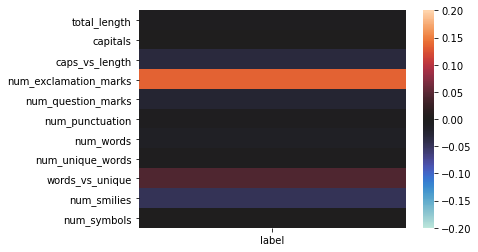

In [11]:
ax = sns.heatmap(df_correlations, vmin=-0.2, vmax=0.2, center=0.0)

We will keep only "num_exclamation_marks" feature and clean the rest of the features.

In [12]:
df['comment'] = df['comment'].apply(lambda x: x.lower())
df['parent_comment'] = df['parent_comment'].apply(lambda x: x.lower())

In [13]:
for i in string.punctuation[1:]:
    df['comment'] = df['comment'].apply(lambda x: x.replace(i, ""))
    df['parent_comment'] = df['parent_comment'].apply(lambda x: x.replace(i, ""))

Distribution of lengths for sarcastic and normal comments is almost the same.


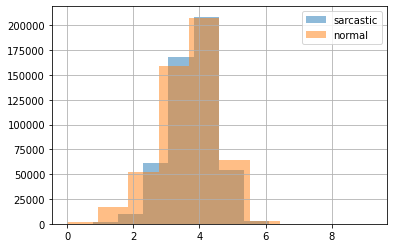

In [14]:
df.loc[df['label'] == 1, 'comment'].str.len().apply(np.log1p).hist(label='sarcastic', alpha=.5)
df.loc[df['label'] == 0, 'comment'].str.len().apply(np.log1p).hist(label='normal', alpha=.5)
plt.legend();

In [15]:
wordcloud = WordCloud(background_color='black', stopwords = STOPWORDS,
                max_words = 200, max_font_size = 100, 
                random_state = 17, width=800, height=400)

Word cloud are nice, but not very useful


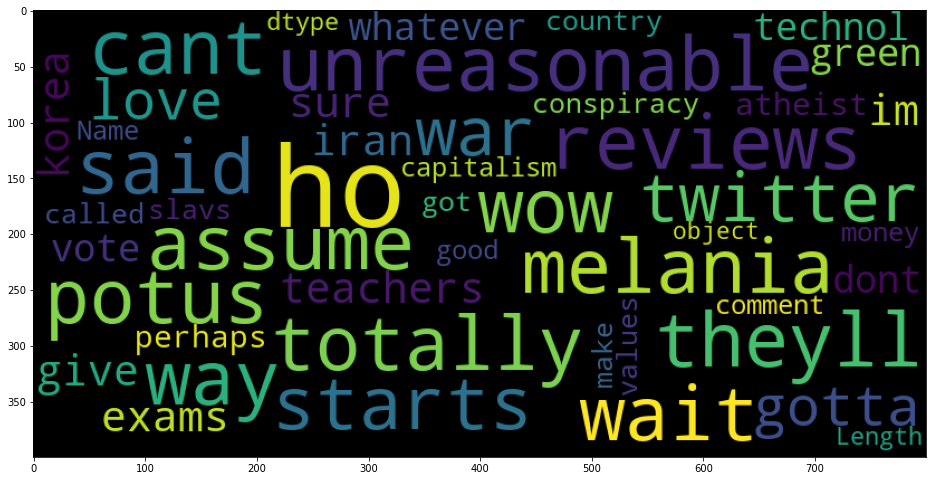

In [16]:
plt.figure(figsize=(16, 12))
wordcloud.generate(str(df.loc[df['label'] == 1, 'comment']))
plt.imshow(wordcloud);

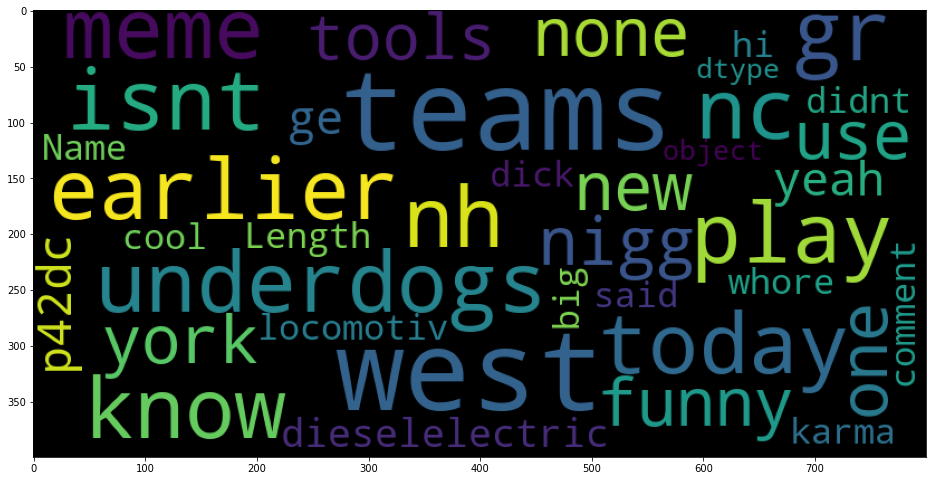

In [17]:
plt.figure(figsize=(16, 12))
wordcloud.generate(str(df.loc[df['label'] == 0, 'comment']))
plt.imshow(wordcloud);

Let's analyze whether some subreddits are more "sarcastic" on average than others


In [18]:
sub_df = df.groupby('subreddit')['label'].agg([np.size, np.mean, np.sum])
sub_df.sort_values(by='sum', ascending=False).head(10)

,size,mean,sum
subreddit,,,
AskReddit,65674,0.401453,26365
politics,39493,0.605348,23907
worldnews,26376,0.642516,16947
leagueoflegends,21034,0.542312,11407
pcmasterrace,18987,0.566651,10759
news,16891,0.603457,10193
funny,17939,0.451474,8099
pics,16152,0.484336,7823
todayilearned,14159,0.547567,7753


In [19]:
sub_df[sub_df['size'] > 1000].sort_values(by='mean', ascending=False).head(10)

,size,mean,sum
subreddit,,,
creepyPMs,5466,0.784303,4287
MensRights,3355,0.680775,2284
ShitRedditSays,1284,0.661994,850
worldnews,26376,0.642516,16947
Libertarian,2562,0.640125,1640
atheism,7377,0.639555,4718
Conservative,1881,0.639553,1203
TwoXChromosomes,1560,0.632692,987
fatlogic,2356,0.623090,1468


The same for authors doesn't yield much insight. Except for the fact that somebody's comments were sampled - we can see the same amounts of sarcastic and non-sarcastic comments.


In [20]:
sub_df = df.groupby('author')['label'].agg([np.size, np.mean, np.sum])
sub_df[sub_df['size'] > 300].sort_values(by='mean', ascending=False).head(10)

,size,mean,sum
author,,,
NeonDisease,422,0.500000,211
ShyBiDude89,404,0.500000,202
ivsciguy,342,0.500000,171
mad-n-fla,318,0.500000,159
mindlessrabble,302,0.500000,151
pokemon_fetish,432,0.500000,216
Biffingston,845,0.499408,422


In [21]:
sub_df = df[df['score'] >= 0].groupby('score')['label'].agg([np.size, np.mean, np.sum])
sub_df[sub_df['size'] > 300].sort_values(by='mean', ascending=False).head(10)

,size,mean,sum
score,,,
0,58141,0.612752,35626
20,3096,0.561370,1738
34,1071,0.556489,596
26,1874,0.554429,1039
59,315,0.552381,174
18,3951,0.551759,2180
13,7277,0.546929,3980
17,4404,0.545867,2404
40,722,0.545706,394


In [22]:
sub_df = df[df['score'] < 0].groupby('score')['label'].agg([np.size, np.mean, np.sum])
sub_df[sub_df['size'] > 300].sort_values(by='mean', ascending=False).head(10)

,size,mean,sum
score,,,
-14,537,0.698324,375
-8,1852,0.696004,1289
-9,1503,0.691284,1039
-6,3088,0.688795,2127
-12,776,0.684278,531
-5,4134,0.678520,2805
-3,6736,0.676069,4554
-2,11924,0.675948,8060
-4,5436,0.673473,3661


In [23]:
#https://buhrmann.github.io/tfidf-analysis.html
def top_tfidf_feats(row, features, top_n=25):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

def top_feats_in_doc(Xtr, features, row_id, top_n=25):
    ''' Top tfidf features in specific document (matrix row) '''
    row = np.squeeze(Xtr[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)

def top_mean_feats(Xtr, features, grp_ids, min_tfidf=0.1, top_n=25):
    ''' Return the top n features that on average are most important amongst documents in rows
        indentified by indices in grp_ids. '''
    
    D = Xtr[grp_ids].toarray()

    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)

def top_feats_by_class(Xtr, features, min_tfidf=0.1, top_n=20):
    ''' Return a list of dfs, where each df holds top_n features and their mean tfidf value
        calculated across documents with the same class label. '''
    sar = df.index[df['label']==1]
    norm = df.index[df['label']==0]
    sar_df = top_mean_feats(Xtr, features, sar, min_tfidf=min_tfidf, top_n=top_n)
    norm_df = top_mean_feats(Xtr, features, norm, min_tfidf=min_tfidf, top_n=top_n)
    return sar_df, norm_df

In [24]:
df = df.reset_index(drop=True)

In [25]:
vectorizer = TfidfVectorizer(min_df=200,  max_features=10000, 
            strip_accents='unicode', analyzer='word',ngram_range=(1,1),
            use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = 'english')
vectorizer.fit(df['comment'])
features = np.array(vectorizer.get_feature_names())
unigrams =  vectorizer.transform(df['comment'])

In [27]:
sar_df, norm_df = top_feats_by_class(unigrams,features)

In [28]:
sar_df

,feature,tfidf
0,yeah,0.020164
1,just,0.017972
2,like,0.014577
3,dont,0.013764
4,forgot,0.012902
5,thats,0.012497
6,people,0.011733
7,right,0.010639
8,im,0.009499
9,know,0.009434


In [29]:
norm_df

,feature,tfidf
0,like,0.016842
1,just,0.014805
2,dont,0.012537
3,im,0.011007
4,think,0.010169
5,thats,0.009687
6,good,0.008533
7,people,0.008151
8,know,0.007806
9,did,0.007099


In [30]:
#temp settings to min=150 to facilitate top features section to run in kernals
#change back to min=10 to get better results
vectorizer = TfidfVectorizer(min_df=150,  max_features=30000, 
            strip_accents='unicode', analyzer='word',ngram_range=(2,2),
            use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = 'english')

vectorizer.fit(df['comment'])
features = np.array(vectorizer.get_feature_names())
bigrams =  vectorizer.transform(df['comment'])

In [31]:
sar_df, norm_df = top_feats_by_class(bigrams,features)

In [32]:
sar_df

,feature,tfidf
0,im sure,0.009339
1,dont know,0.004936
2,sounds like,0.003290
3,just like,0.003050
4,good thing,0.003050
5,looks like,0.002525
6,dont worry,0.002276
7,didnt know,0.002212
8,youre right,0.002156
9,white people,0.001909


In [33]:
norm_df

,feature,tfidf
0,looks like,0.004689
1,dont know,0.003956
2,dont think,0.003701
3,sounds like,0.002828
4,im sure,0.002622
5,pretty sure,0.002052
6,feel like,0.001919
7,ive seen,0.001862
8,dont want,0.001635
9,look like,0.001537


In [34]:
vectorizer = TfidfVectorizer(min_df=100,  max_features=30000, 
            strip_accents='unicode', analyzer='char',ngram_range=(1,4),
            use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = 'english')

vectorizer.fit(df['comment'])
features = np.array(vectorizer.get_feature_names())
chargram =  vectorizer.transform(df['comment'])

/home/jchiang/.local/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:520: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'stop_words' will not be used"


In [35]:
sar_df, norm_df = top_feats_by_class(chargram,features)
sar_df

,feature,tfidf
0,rgot,0.003211
1,orgo,0.003210
2,forg,0.003202
3,rgo,0.003198
4,org,0.003123
5,got,0.002941
6,rg,0.002831
7,got,0.002673
8,ot t,0.002318
9,u fo,0.002294


In [36]:
norm_df

,feature,tfidf
0,no,0.002368
1,yes,0.002306
2,!,0.002236
3,ye,0.002158
4,0,0.002136
5,ank,0.002130
6,hank,0.002127
7,wha,0.001935
8,nk,0.001930
9,what,0.001919


In [ ]:
train_texts, valid_texts, y_train, y_valid = \
        train_test_split(df['comment'], df['label'], random_state=17)